In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import lstm
import cnn_batchnorm_lstm
import multiple_branch_cnn
import time
import matplotlib.pyplot as plt
import dataload
from datetime import datetime
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from keras.callbacks import EarlyStopping, TensorBoard
from keras.backend import clear_session
import pandas as pd
import gc

from keras.models import load_model

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [74]:
def plot_results_multiple(predicted_data, true_data, prediction_len, fig_path=None):
    fig, axs = plt.subplots(len(predicted_data), 1, sharex=True)
    if (len(predicted_data) > 1):
        for x in range(len(predicted_data)):
            axs[x].plot(true_data[x], label='True Data')
            # Pad the list of predictions to shift it in the graph to it's correct start
            for i, data in enumerate(predicted_data[x][0]):
                padding = [None for p in range(i * prediction_len)]
                axs[x].plot(padding + data, label='Prediction')
            axs[x].set_title(predicted_data[x][1])
    else:
        axs.plot(true_data, label='True Data')
        for i, data in enumerate(predicted_data[0][0]):
            padding = [None for p in range(i * prediction_len)]
            axs.plot(padding + data, label='Prediction')
        axs.set_title(predicted_data[0][1])
    if (fig_path is not None):
        fig.savefig(fig_path)
    else:
        plt.show()

In [3]:
global_start_time = time.time()
epochs  = 100
seq_lens = [50]
predict_len = 10

# description: several-word description of the purpose of the run
description = 'test_plots'


early_stopping = EarlyStopping(patience=20)
tensorboard = TensorBoard(log_dir='tensorboard', write_grads=True)

#### Load data with 50 sequence

In [4]:
X_train, y_train, X_test, y_test = dataload.load_data('daily_spx.csv', 50, normalise_window=True, smoothing=False, smoothing_window_length=5, smoothing_polyorder=3, reshape=True)

reshaping  (4012, 50)
(4012, 50, 1)
(446, 50, 1)


### Load Model

In [5]:
folder = 'stock_single_nosmooth_1541110224/seq_len_50'
top_models = [load_model('{0}/model-{1}.h5'.format(folder,i)) for i in range(1,4)]

#### Predict and Scores with sequence len 50

In [6]:
predictions = [dataload.predict_sequences_multiple(model, X_test, 50, predict_len)
        for model in top_models]
scores = [model.evaluate(X_test, y_test, verbose=0)
        for model in top_models]

44
10
44
10
44
10


In [7]:
print("Shape of predictions")
print(len(predictions),"*",len(predictions[0]),"*",len(predictions[0][0]))

Shape of predictions
3 * 44 * 10


In [8]:
print("Scores")
print(scores)

Scores
[6.928927215317895e-05, 0.00040447673861630627, 0.00013680361611183916]


### This plot is in reverse order of Model number

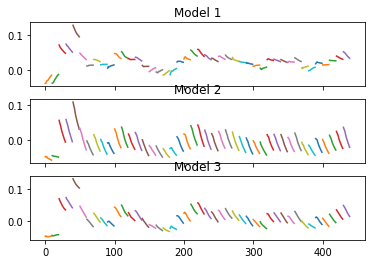

In [75]:
top_model_plots = [(predictions[i], 'Model {}'.format(i+1)) for i in range(len(predictions))]
plot_results_multiple(top_model_plots, y_test, predict_len, fig_path = 'plots_test/plots.pdf')

446
